In [1]:
from neuralNet import ConvexNeuralNet, LinearNeuralNet, MatrixConvexNeuralNet, MatrixLinearNeuralNet
from pdes import LinearQuadraticRegulator2D, NonLinear
from enums import ActivationFunctionEnum, PositivityFunctionEnum, InitFunctionEnum
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from utils import setLogger

setLogger("training")

# Linear PDE

## Linear neural network

In [2]:
layers = [2, 32, 32, 1]
network = LinearNeuralNet(layers)
print( network.model )
gamma = {'data': 0, 'gradient': 0, 'residual': 1}
pde = LinearQuadraticRegulator2D( network, gamma )

lrs = [1e-2, 1e-3]
iterations = [1000, 2000]

resu = pde.train(
    interiorPointCount=10,
    dataPointCount=10,
    lrs=lrs,
    iterations=iterations,
    sampling='random'
    )

Sequential(
  (0): Linear(in_features=2, out_features=32, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=32, out_features=32, bias=True)
  (3): Sigmoid()
  (4): Linear(in_features=32, out_features=1, bias=True)
)
2024-08-31 11:25:27,684 - training - INFO - 0 / 3000 (0 / 1000), lr:1.0e-02, loss:2.38e-01 (data: 0.00e+00, grad: 0.00e+00, res: 2.38e-01)
2024-08-31 11:25:42,356 - training - INFO - 1000 / 3000 (0 / 2000), lr:1.0e-03, loss:2.92e-05 (data: 0.00e+00, grad: 0.00e+00, res: 2.92e-05)
2024-08-31 11:25:55,952 - training - INFO - 2000 / 3000 (1000 / 2000), lr:1.0e-03, loss:1.26e-05 (data: 0.00e+00, grad: 0.00e+00, res: 1.26e-05)


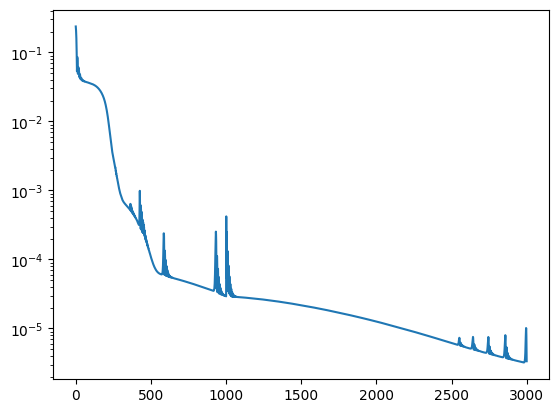

In [3]:
ax = resu['loss'].plot()
ax.set_yscale("log")

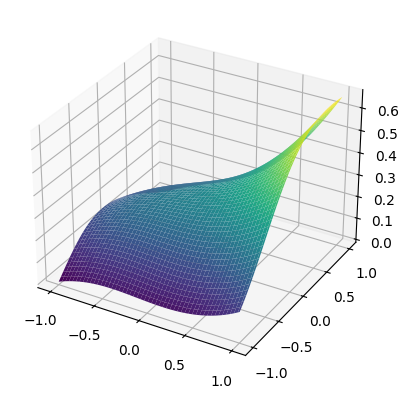

In [4]:
x = np.linspace(-1, 1, 100)
y = np.linspace(-1, 1, 100)

X, Y = np.meshgrid(x, y)
space = pde.getEvaluationPoints() 

Z = pde.network.computeValueFunction(space).reshape(-1, 100) - pde.network.computeValueFunction(space).reshape(-1, 100).min()

ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z.detach().cpu().numpy(), cmap='viridis');

## Convex network

In [5]:
layers = [2, 32, 32, 1]
network = ConvexNeuralNet( layers, activation=ActivationFunctionEnum.GELU, positivity=PositivityFunctionEnum.ICNN, init=InitFunctionEnum.TRADITIONAL )
gamma = {'data': 0, 'gradient': 0, 'residual': 1}
pde = LinearQuadraticRegulator2D( network, gamma )

print(network.model)

lrs = [1e-3, 1e-4, 1e-5]
iterations = [1000, 2000, 3000]

resu = pde.train(
    interiorPointCount=100,
    dataPointCount=10,
    lrs=lrs,
    iterations=iterations,
    sampling='random'
    )

Sequential(
  (0): Linear(in_features=2, out_features=32, bias=True)
  (1): GELU(approximate=none)
  (2): ConvexLinear(in_features=32, out_features=32, bias=True)
  (3): GELU(approximate=none)
  (4): ConvexLinear(in_features=32, out_features=1, bias=True)
)
2024-08-31 11:26:24,879 - training - INFO - 0 / 6000 (0 / 1000), lr:1.0e-03, loss:7.11e-02 (data: 0.00e+00, grad: 0.00e+00, res: 7.11e-02)
2024-08-31 11:26:38,487 - training - INFO - 1000 / 6000 (0 / 2000), lr:1.0e-04, loss:3.10e-05 (data: 0.00e+00, grad: 0.00e+00, res: 3.10e-05)
2024-08-31 11:26:51,644 - training - INFO - 2000 / 6000 (1000 / 2000), lr:1.0e-04, loss:3.70e-06 (data: 0.00e+00, grad: 0.00e+00, res: 3.70e-06)
2024-08-31 11:27:04,232 - training - INFO - 3000 / 6000 (0 / 3000), lr:1.0e-05, loss:2.28e-06 (data: 0.00e+00, grad: 0.00e+00, res: 2.28e-06)
2024-08-31 11:27:17,043 - training - INFO - 4000 / 6000 (1000 / 3000), lr:1.0e-05, loss:1.83e-06 (data: 0.00e+00, grad: 0.00e+00, res: 1.83e-06)
2024-08-31 11:27:29,742 - tra

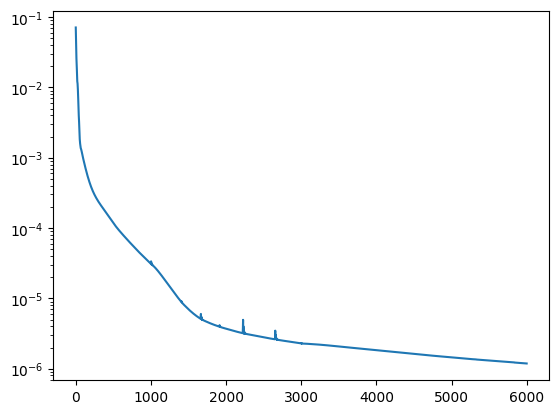

In [6]:
ax = resu['loss'].plot()
ax.set_yscale("log")

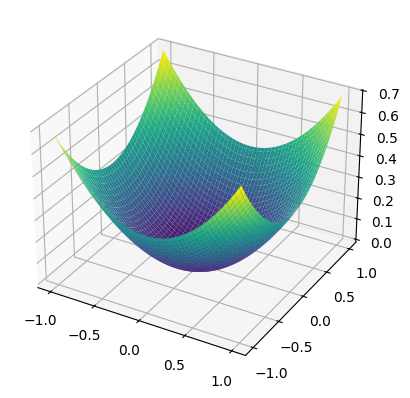

In [7]:
x = np.linspace(-1, 1, 100)
y = np.linspace(-1, 1, 100)

X, Y = np.meshgrid(x, y)
space = pde.getEvaluationPoints()

Z = pde.network.computeValueFunction(space).reshape(-1, 100) - pde.network.computeValueFunction(space).reshape(-1, 100).min()

ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z.detach().cpu().numpy(), cmap='viridis');

# Non linear example

In [15]:
layers = [2, 32, 32, 1]
network = ConvexNeuralNet( layers, activation=ActivationFunctionEnum.GELU, positivity=PositivityFunctionEnum.CONVEX, init=InitFunctionEnum.TRADITIONAL )
gamma = {'data': 0, 'gradient': 0, 'residual': 1}
pde = NonLinear( network, gamma )

print(network.model)

lrs = [1e-1, 1e-2, 1e-3, 1e-4]
iterations = [1000, 2000, 3000, 4000]

resu = pde.train(
    interiorPointCount=500,
    dataPointCount=10,
    lrs=lrs,
    iterations=iterations,
    sampling='random'
    )

Sequential(
  (0): Linear(in_features=2, out_features=32, bias=True)
  (1): GELU(approximate=none)
  (2): ConvexLinear(in_features=32, out_features=32, bias=True)
  (3): GELU(approximate=none)
  (4): ConvexLinear(in_features=32, out_features=1, bias=True)
)
2024-08-31 11:33:52,593 - training - INFO - 0 / 10000 (0 / 1000), lr:1.0e-01, loss:7.00e+06 (data: 0.00e+00, grad: 0.00e+00, res: 7.00e+06)
2024-08-31 11:34:06,038 - training - INFO - 1000 / 10000 (0 / 2000), lr:1.0e-02, loss:3.50e+01 (data: 0.00e+00, grad: 0.00e+00, res: 3.50e+01)
2024-08-31 11:34:20,337 - training - INFO - 2000 / 10000 (1000 / 2000), lr:1.0e-02, loss:1.03e-02 (data: 0.00e+00, grad: 0.00e+00, res: 1.03e-02)
2024-08-31 11:34:34,896 - training - INFO - 3000 / 10000 (0 / 3000), lr:1.0e-03, loss:1.60e-03 (data: 0.00e+00, grad: 0.00e+00, res: 1.60e-03)
2024-08-31 11:34:49,371 - training - INFO - 4000 / 10000 (1000 / 3000), lr:1.0e-03, loss:2.23e-04 (data: 0.00e+00, grad: 0.00e+00, res: 2.23e-04)
2024-08-31 11:35:04,138 

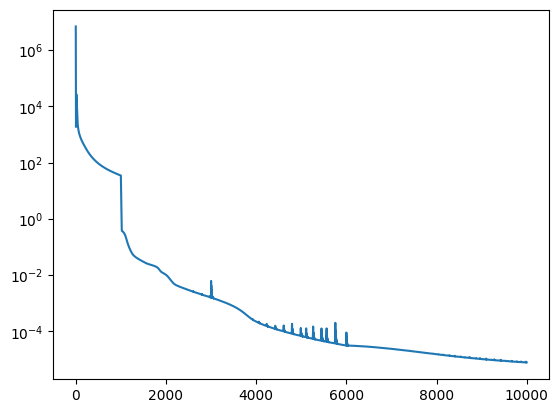

In [16]:
ax = resu['loss'].plot()
ax.set_yscale("log")

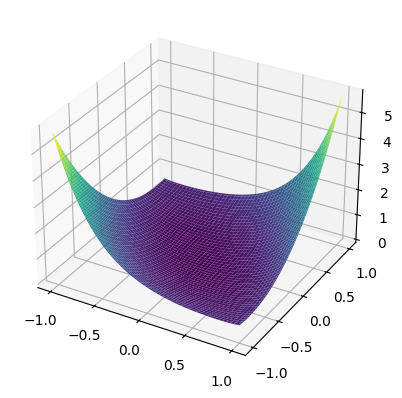

In [17]:
x = np.linspace(-1, 1, 100)
y = np.linspace(-1, 1, 100)

X, Y = np.meshgrid(x, y)
space = pde.getEvaluationPoints() 

Z = pde.network.computeValueFunction(space).reshape(-1, 100) - pde.network.computeValueFunction(space).reshape(-1, 100).min()

ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z.detach().cpu().numpy(), cmap='viridis');

## Activation function experiments

In [ ]:
from enums import ActivationFunctionEnum

layers = [2, 32, 32, 1]
init = InitFunctionEnum.TRADITIONAL
positivity = PositivityFunctionEnum.ICNN
equation = LinearQuadraticRegulator2D

res = []

for activation in ActivationFunctionEnum:
    for i in range(10):
        network = ConvexNeuralNet( layers, activation=activation, positivity=positivity, init=init )
        gamma = {'data': 0, 'gradient': 0, 'residual': 1}
        pde = equation( network, gamma )

        print(network.model)

        lrs = [1e-3, 1e-4, 1e-5]
        iterations = [1000, 2000, 3000]

        resu = pde.train(
            interiorPointCount=100,
            dataPointCount=10,
            lrs=lrs,
            iterations=iterations,
            sampling='random'
            )
        
        x = np.linspace(-1, 1, 100)
        y = np.linspace(-1, 1, 100)

        X, Y = np.meshgrid(x, y)
        space = pde.getEvaluationPoints()

        Z = pde.network.computeValueFunction(space).reshape(-1, 100) - pde.network.computeValueFunction(space).reshape(-1, 100).min()
        res.append({"activation": activation.name, "loss": resu['loss'].iloc[-1], "value": Z})

In [ ]:
res = pd.DataFrame(res).sort_values("loss")
res

In [ ]:
resActivation = res.groupby("activation")['value'].first()
resActivation.index

In [ ]:
x = np.linspace(-1, 1, 100)
y = np.linspace(-1, 1, 100)

X, Y = np.meshgrid(x, y)
space = pde.getEvaluationPoints()

Z = resActivation[ActivationFunctionEnum.GELU.name]

ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z.detach().cpu().numpy(), cmap='viridis');

In [ ]:
# plot activation functions

def celu(x, alpha=1.0):
    return np.maximum(0, x) + np.minimum(0, alpha * (np.exp(x / alpha) - 1))

def elu(x, alpha=1.0):
    return np.where(x > 0, x, alpha * (np.exp(x) - 1))

def gelu(x):
    return 0.5 * x * (1 + np.tanh(np.sqrt(2 / np.pi) * (x + 0.044715 * np.power(x, 3))))

def mish(x):
    return x * np.tanh(np.log1p(np.exp(x)))

x = np.linspace(-3, 3, 400)

plt.figure(figsize=(6, 4))

plt.plot(x, celu(x), label='CELU', linestyle='--')
plt.plot(x, elu(x), label='ELU', linestyle='--')
plt.plot(x, gelu(x), label='GELU', linestyle='--')
plt.plot(x, mish(x), label='Mish', linestyle='--')

plt.title('Activation Functions')
plt.xlabel('x')
plt.ylabel('Activation')
plt.legend()
plt.grid(True)

plt.show()

# Reproduce the quadrant

In [4]:
import torch

# First, let's include our MirrorDescent optimizer
class MirrorDescent(torch.optim.Optimizer):
    def __init__(self, params, lr=1e-3, weight_decay=0):
        defaults = dict(lr=lr, weight_decay=weight_decay)
        super(MirrorDescent, self).__init__(params, defaults)

    @torch.no_grad()
    def step(self, closure=None):
        loss = None
        if closure is not None:
            with torch.enable_grad():
                loss = closure()

        for group in self.param_groups:
            for p in group['params']:
                if p.grad is None:
                    continue
                
                d_p = p.grad
                if group['weight_decay'] != 0:
                    d_p = d_p.add(p, alpha=group['weight_decay'])
                
                # Mirror map: negative entropy
                # Gradient of mirror map: log(p)
                # Inverse gradient of mirror map: exp(p)
                p.copy_(torch.exp(torch.log(torch.abs(p) + 1e-8) - group['lr'] * d_p))
                
                # Projection onto the positive orthant
                p.clamp_(min=0)


Training with Mirror Descent
Epoch [100/1000], Loss: 0.0099
Epoch [200/1000], Loss: 0.0117
Epoch [300/1000], Loss: 0.0061
Epoch [400/1000], Loss: 0.0036
Epoch [500/1000], Loss: 0.0040
Epoch [600/1000], Loss: 0.0031
Epoch [700/1000], Loss: 0.0089
Epoch [800/1000], Loss: 0.0033
Epoch [900/1000], Loss: 0.0047
Epoch [1000/1000], Loss: 0.0042

Training with SGD
Epoch [100/1000], Loss: 0.0861
Epoch [200/1000], Loss: 0.0559
Epoch [300/1000], Loss: 0.0448
Epoch [400/1000], Loss: 0.0386
Epoch [500/1000], Loss: 0.0363
Epoch [600/1000], Loss: 0.0313
Epoch [700/1000], Loss: 0.0290
Epoch [800/1000], Loss: 0.0276
Epoch [900/1000], Loss: 0.0265
Epoch [1000/1000], Loss: 0.0240

Training with Adam
Epoch [100/1000], Loss: 0.0124
Epoch [200/1000], Loss: 0.0090
Epoch [300/1000], Loss: 0.0052
Epoch [400/1000], Loss: 0.0052
Epoch [500/1000], Loss: 0.0034
Epoch [600/1000], Loss: 0.0022
Epoch [700/1000], Loss: 0.0025
Epoch [800/1000], Loss: 0.0033
Epoch [900/1000], Loss: 0.0083
Epoch [1000/1000], Loss: 0.006

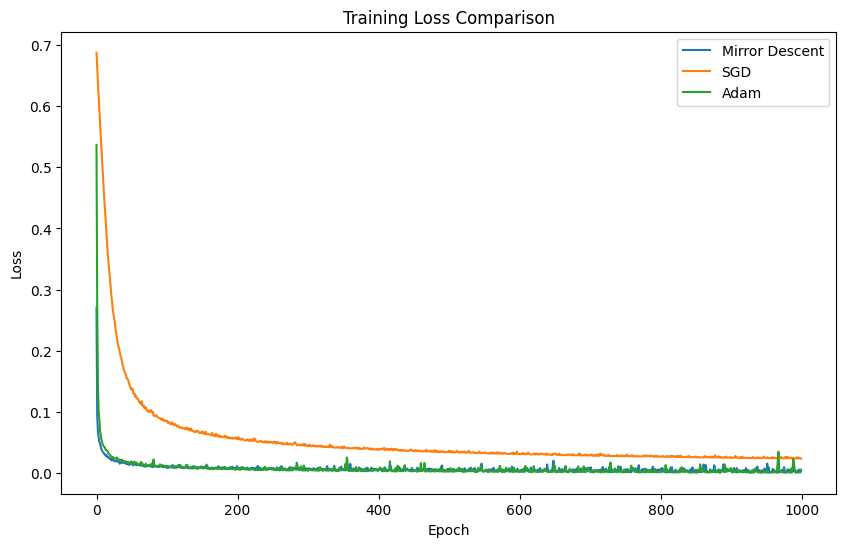


Test Accuracies:
Epoch [100/1000], Loss: 0.0123
Epoch [200/1000], Loss: 0.0104
Epoch [300/1000], Loss: 0.0093
Epoch [400/1000], Loss: 0.0086
Epoch [500/1000], Loss: 0.0135
Epoch [600/1000], Loss: 0.0113
Epoch [700/1000], Loss: 0.0110
Epoch [800/1000], Loss: 0.0100
Epoch [900/1000], Loss: 0.0077
Epoch [1000/1000], Loss: 0.0036
Mirror Descent: 0.9900
Epoch [100/1000], Loss: 0.0856
Epoch [200/1000], Loss: 0.0555
Epoch [300/1000], Loss: 0.0469
Epoch [400/1000], Loss: 0.0399
Epoch [500/1000], Loss: 0.0373
Epoch [600/1000], Loss: 0.0312
Epoch [700/1000], Loss: 0.0298
Epoch [800/1000], Loss: 0.0277
Epoch [900/1000], Loss: 0.0256
Epoch [1000/1000], Loss: 0.0240
SGD: 0.9800
Epoch [100/1000], Loss: 0.0119
Epoch [200/1000], Loss: 0.0055
Epoch [300/1000], Loss: 0.0027
Epoch [400/1000], Loss: 0.0037
Epoch [500/1000], Loss: 0.0028
Epoch [600/1000], Loss: 0.0026
Epoch [700/1000], Loss: 0.0019
Epoch [800/1000], Loss: 0.0021
Epoch [900/1000], Loss: 0.0025
Epoch [1000/1000], Loss: 0.0010
Adam: 0.9800


In [8]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt

class ImprovedMirrorDescent(torch.optim.Optimizer):
    def __init__(self, params, lr=1e-3, alpha=0.99, eps=1e-8):
        defaults = dict(lr=lr, alpha=alpha, eps=eps)
        super(ImprovedMirrorDescent, self).__init__(params, defaults)

    @torch.no_grad()
    def step(self, closure=None):
        loss = None
        if closure is not None:
            with torch.enable_grad():
                loss = closure()

        for group in self.param_groups:
            for p in group['params']:
                if p.grad is None:
                    continue
                
                grad = p.grad
                state = self.state[p]

                # Initialization
                if len(state) == 0:
                    state['step'] = 0
                    state['exp_avg_sq'] = torch.zeros_like(p)

                exp_avg_sq = state['exp_avg_sq']
                alpha = group['alpha']

                state['step'] += 1

                # Update moving average of squared gradients
                exp_avg_sq.mul_(alpha).addcmul_(grad, grad, value=1 - alpha)

                # Compute adaptive learning rate
                step_size = group['lr'] / (exp_avg_sq.sqrt() + group['eps'])

                # Mirror descent step
                p.addcmul_(grad, step_size, value=-1)

        return loss

# MirrorDescent optimizer (as defined earlier)
class MirrorDescent(torch.optim.Optimizer):
    def __init__(self, params, lr=1e-3, weight_decay=0):
        defaults = dict(lr=lr, weight_decay=weight_decay)
        super(MirrorDescent, self).__init__(params, defaults)

    @torch.no_grad()
    def step(self, closure=None):
        loss = None
        if closure is not None:
            with torch.enable_grad():
                loss = closure()

        for group in self.param_groups:
            for p in group['params']:
                if p.grad is None:
                    continue
                
                d_p = p.grad
                if group['weight_decay'] != 0:
                    d_p = d_p.add(p, alpha=group['weight_decay'])
                
                p.copy_(torch.exp(torch.log(torch.abs(p) + 1e-8) - group['lr'] * d_p))
                p.clamp_(min=0)

        return loss

# Simple neural network
class SimpleNet(nn.Module):
    def __init__(self):
        super(SimpleNet, self).__init__()
        self.fc1 = nn.Linear(2, 10)
        self.fc2 = nn.Linear(10, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Generate data
X = torch.randn(1000, 2)
y = (X[:, 0] + X[:, 1] > 0).float().unsqueeze(1)
dataset = TensorDataset(X, y)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

# Training function
def train_model(model, optimizer, num_epochs=1000):
    losses = []
    for epoch in range(num_epochs):
        epoch_loss = 0
        for batch_X, batch_y in dataloader:
            optimizer.zero_grad()
            outputs = model(batch_X)
            loss = F.binary_cross_entropy_with_logits(outputs, batch_y)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()
        
        avg_loss = epoch_loss / len(dataloader)
        losses.append(avg_loss)
        if (epoch + 1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}')
    return losses

# Train with different optimizers
optimizers = {
    'Mirror Descent': lambda m: ImprovedMirrorDescent(m.parameters(), lr=0.01),
    'SGD': lambda m: torch.optim.SGD(m.parameters(), lr=0.01),
    'Adam': lambda m: torch.optim.Adam(m.parameters(), lr=0.01)
}

results = {}

for name, opt_func in optimizers.items():
    print(f"\nTraining with {name}")
    model = SimpleNet()
    optimizer = opt_func(model)
    losses = train_model(model, optimizer)
    results[name] = losses

# Plot results
plt.figure(figsize=(10, 6))
for name, losses in results.items():
    plt.plot(losses, label=name)
plt.title('Training Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate models
def evaluate_model(model, X, y):
    model.eval()
    with torch.no_grad():
        predictions = (model(X) > 0).float()
        accuracy = (predictions == y).float().mean()
    return accuracy.item()

test_X = torch.randn(100, 2)
test_y = (test_X[:, 0] + test_X[:, 1] > 0).float().unsqueeze(1)

print("\nTest Accuracies:")
for name, opt_func in optimizers.items():
    model = SimpleNet()
    optimizer = opt_func(model)
    train_model(model, optimizer)
    accuracy = evaluate_model(model, test_X, test_y)
    print(f"{name}: {accuracy:.4f}")

In [9]:
import torch
from torch.optim import Optimizer

class CorrectPositiveMirrorDescent(Optimizer):
    def __init__(self, params, lr=1e-3, eps=1e-8):
        defaults = dict(lr=lr, eps=eps)
        super(CorrectPositiveMirrorDescent, self).__init__(params, defaults)

    @torch.no_grad()
    def step(self, closure=None):
        loss = None
        if closure is not None:
            with torch.enable_grad():
                loss = closure()

        for group in self.param_groups:
            for p in group['params']:
                if p.grad is None:
                    continue
                
                grad = p.grad
                state = self.state[p]

                # Mirror Descent update with negative entropy mirror map
                p.data.copy_(
                    torch.exp(torch.log(p + group['eps']) - group['lr'] * grad)
                )

        return loss

# Modified SimpleNet to initialize with positive weights
class PositiveSimpleNet(nn.Module):
    def __init__(self):
        super(PositiveSimpleNet, self).__init__()
        self.fc1 = nn.Linear(2, 10, bias=False)
        self.fc2 = nn.Linear(10, 1, bias=False)
        self.initialize_positive()

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

    def initialize_positive(self):
        with torch.no_grad():
            self.fc1.weight.abs_()
            self.fc2.weight.abs_()

# Minimalistic Neural Net

In [11]:
import torch
import torch.nn as nn

class MinimalQuadraticNetwork(nn.Module):
    def __init__(self):
        super(MinimalQuadraticNetwork, self).__init__()
        # Initialize two positive weights
        self.weights = nn.Parameter(torch.rand(2))

    def forward(self, x):
        # Ensure weights are positive
        positive_weights = torch.exp(self.weights)
        
        # Compute 1/2 x^T P x
        # Where P is a diagonal matrix with our two weights
        return 0.5 * torch.sum(positive_weights * x**2)

# Example usage
net = MinimalQuadraticNetwork()
optimizer = CorrectPositiveMirrorDescent(net.parameters(), lr=0.01)

# Dummy data
x = torch.tensor([1.0, 2.0])

# Forward pass
output = net(x)
print(f"Output: {output.item()}")

# Compute gradient and update weights
output.backward()
optimizer.step()

print(f"Updated weights: {torch.exp(net.weights).tolist()}")

Output: 4.695387840270996
Updated weights: [1.487635612487793, 1.923328161239624]
